In [196]:
import pandas as pd
dataframe = pd.read_csv("dados_regressao.csv")


## Interpretando o Dataset

In [197]:
dataframe.head()

,sexo,idade,experiencia,escolaridade,salario
0,Homem,49,33,12,76058.935879
1,Homem,49,33,9,75116.620159
2,Homem,44,11,8,52445.074167
3,Mulher,35,36,19,56891.606445
4,Homem,43,10,11,47646.556098


In [198]:
print(dataframe.shape)

(200, 5)


In [199]:
dataframe.describe()


,idade,experiencia,escolaridade,salario
count,200.000000,200.000000,200.000000,200.000000
mean,40.380000,20.210000,14.065000,56324.441292
std,11.349434,11.814985,3.593794,11484.491146
min,20.000000,1.000000,8.000000,33290.318037
25%,31.000000,9.000000,11.000000,47972.723059
50%,41.000000,20.000000,14.000000,56821.152998
75%,49.000000,30.250000,17.000000,63312.406635
max,60.000000,40.000000,20.000000,88894.113282


/tmp/ipykernel_2830/3026307788.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe['salario'])


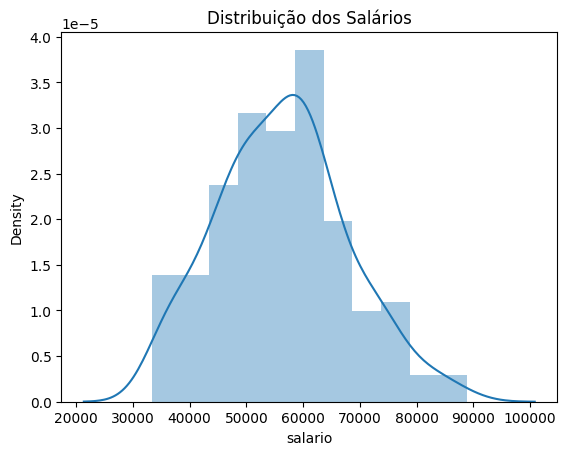

In [200]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.title('Distribuição dos Salários')
sns.distplot(dataframe['salario'])
plt.show()

In [201]:
columns = dataframe.columns.to_list()
for col in columns:
    print(dataframe[col].value_counts(normalize=True) * 100)
    print("----------")

sexo
Homem     51.5
Mulher    48.5
Name: proportion, dtype: float64
----------
idade
49    5.0
39    4.5
44    4.0
21    4.0
48    3.5
52    3.5
45    3.5
32    3.5
36    3.5
37    3.0
26    3.0
22    3.0
59    3.0
35    3.0
42    3.0
25    3.0
29    3.0
31    2.5
50    2.5
27    2.5
55    2.5
60    2.5
30    2.0
43    2.0
40    2.0
54    2.0
46    2.0
51    2.0
28    2.0
47    2.0
56    2.0
38    1.5
41    1.5
57    1.5
58    1.5
33    1.0
24    1.0
53    1.0
20    0.5
23    0.5
34    0.5
Name: proportion, dtype: float64
----------
experiencia
8     5.5
10    4.5
6     4.0
33    4.0
23    3.5
20    3.5
11    3.5
36    3.5
7     3.5
38    3.0
26    3.0
28    3.0
30    3.0
40    3.0
9     3.0
24    2.5
37    2.5
39    2.5
3     2.5
14    2.5
2     2.5
16    2.5
17    2.5
15    2.0
32    2.0
12    2.0
19    2.0
4     2.0
29    2.0
25    2.0
1     1.5
27    1.5
35    1.5
34    1.5
22    1.5
31    1.5
18    1.0
5     1.0
13    1.0
21    0.5
Name: proportion, dtype: float64
----------
escol

Olhando para o gráfico anterior, temos que o salário mais comum é de 60 mil por ano.

Temos também alguns salários poucos vistos como os de 80 e 85 mil.

#### Gráficos de dispersão

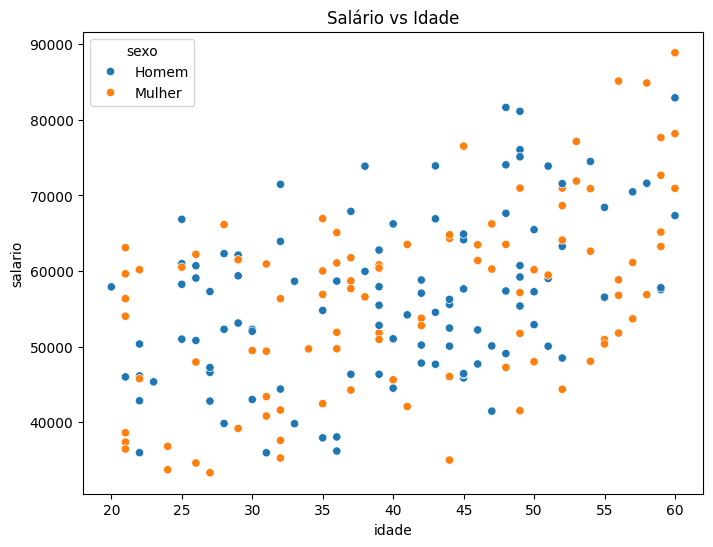

In [202]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='idade', y='salario', hue='sexo', data=dataframe)
plt.title('Salário vs Idade')
plt.show()

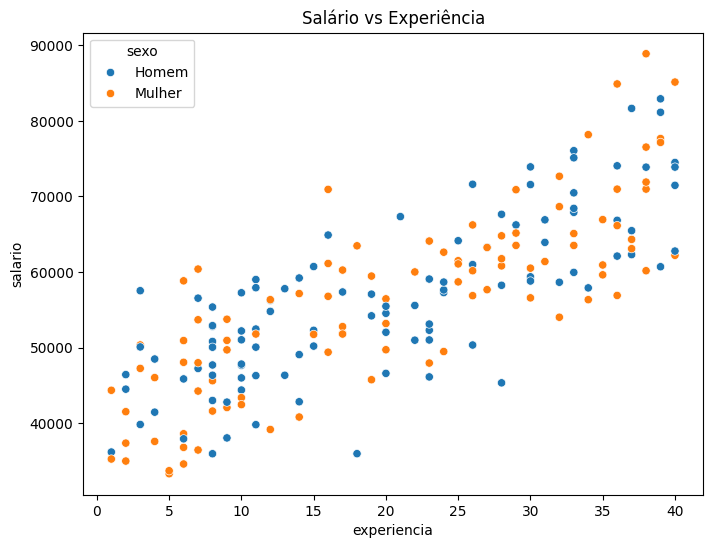

In [203]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='experiencia', y='salario', hue='sexo', data=dataframe)
plt.title('Salário vs Experiência')
plt.show()

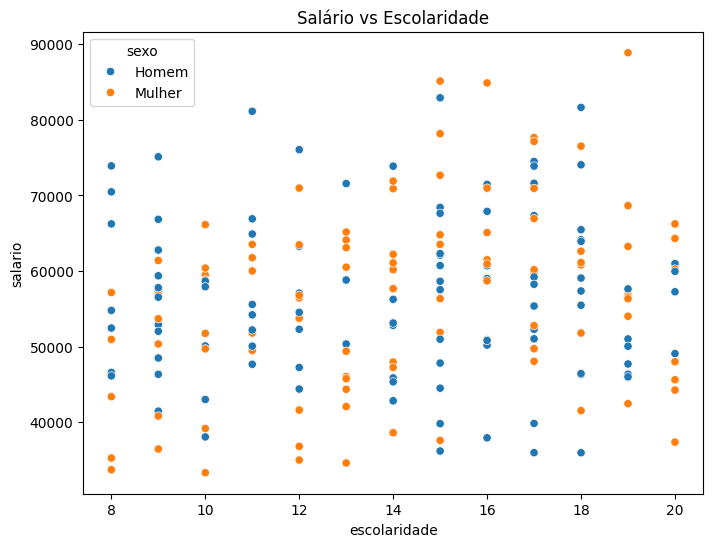

In [204]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='escolaridade', y='salario', hue='sexo', data=dataframe)
plt.title('Salário vs Escolaridade')
plt.show()

### Escolha da variável preditora

A escolha da variável preditora será a experiência, pois dado o gráfico de dispersão, quuanto maior a experiência, maior é o salário.

## Ajuste do modelo de Regressão

In [205]:
from sklearn.linear_model import LinearRegression

model_lg = LinearRegression()
model_lg.fit(dataframe[["experiencia"]], dataframe["salario"])

LinearRegression()

In [206]:
a_coeff = model_lg.coef_[0]
l_coeff = model_lg.intercept_

print("Coeficiente Angular: {0}\nCoeficiente Linear: {1}".format(a_coeff, l_coeff))

Coeficiente Angular: 776.0447395248311
Coeficiente Linear: 40640.577106451026


Apenas lembrando, o salário é anual, ou seja, 40.640,57 / 12 = 3.386,71

Lembrando da função que monta a reta:

y = a +bx

OU SEJA:

y = l_coeff + a_coeff * x

OU SEJA

salario_previsto = intercepto + (coeficiente_angular * experiencia)

O intercepto (l_coeff) é o valor de y quando x = 0, neste caso, é quando alguém tem 0 anos de experiência.

O coeficiente angular (a_coeff) representa o quanto o salário aumenta (ou diminui) para cada ano a mais de experiência.

In [207]:
y_pred = l_coeff + a_coeff * dataframe["experiencia"]

print(y_pred)

0      66250.053511
1      66250.053511
2      49177.069241
3      68578.187729
4      48401.024502
           ...     
195    62369.829813
196    45296.845544
197    47624.979762
198    66250.053511
199    55385.427157
Name: experiencia, Length: 200, dtype: float64


### Linha de Regressão

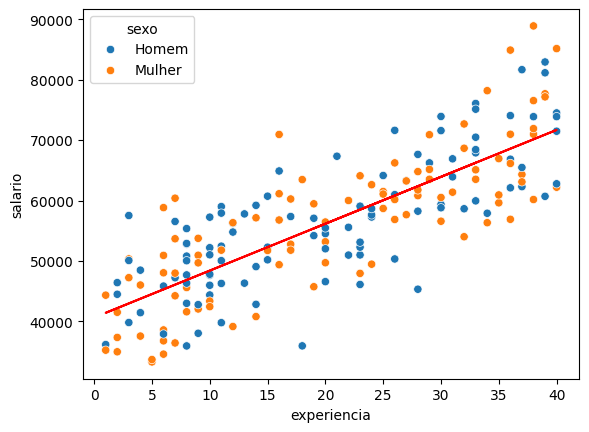

In [208]:
sns.scatterplot(x='experiencia', y='salario', hue='sexo', data=dataframe)
plt.plot(dataframe["experiencia"], l_coeff + a_coeff * dataframe["experiencia"], color="red")
plt.show()

Por exemplo, vamos tentar prever qual o salário de uma pessoa com 10 anos de experiência.

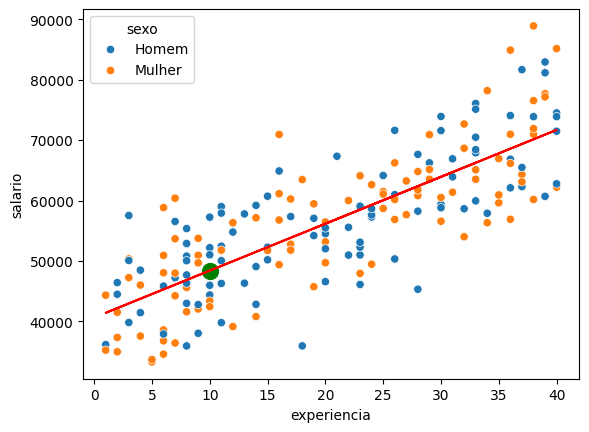

In [209]:
sns.scatterplot(x='experiencia', y='salario', hue='sexo', data=dataframe)
plt.plot(dataframe["experiencia"], l_coeff + a_coeff * dataframe["experiencia"], color="red")
plt.scatter(10, l_coeff + a_coeff * 10, color="green", s=130) # S = tamanho = size
plt.show()

## Avaliação do Modelo

In [210]:
import numpy as np

y_real = dataframe["salario"]
y_pred = l_coeff + a_coeff * dataframe["experiencia"]

print(y_real)

0      76058.935879
1      75116.620159
2      52445.074167
3      56891.606445
4      47646.556098
           ...     
195    58237.358911
196    37909.002304
197    49687.356581
198    59944.807820
199    45735.122344
Name: salario, Length: 200, dtype: float64


In [211]:
print(y_pred)

0      66250.053511
1      66250.053511
2      49177.069241
3      68578.187729
4      48401.024502
           ...     
195    62369.829813
196    45296.845544
197    47624.979762
198    66250.053511
199    55385.427157
Name: experiencia, Length: 200, dtype: float64


### Erro Quadrático Médio (EQM)

In [212]:
# Subtrai cada valor real por cada valor predito e eleva ao quadro
diferenca_ao_quadrado = (y_real - y_pred) ** 2

#Tira a media
eqm = diferenca_ao_quadrado.mean()

print(eqm)


47584647.106782705


### Erro Absoluto Médio (MAE)



In [213]:
# Diferenca de cada valor real por cada valor predito (absoluto)
diferenca = (y_real - y_pred).abs()

# media
mae = diferenca.mean()
print(mae)

5599.719824440801


### Erro Percentual Absoluto Médio (MAPE)

In [214]:
diferenca_percent = ((y_real - y_pred).abs() / y_real) * 100

mape = diferenca_percent.mean()

print(mape)

10.43424336853212


Apenas para fins de comparação e entendimento das função, vamos usar também as funções prontas do sklearn

In [215]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

#  Erro Quadrático Médio (EQM)
eqm = mean_squared_error(y_real, y_pred)
print(f"EQM: {eqm}")

# Erro Absoluto Médio (MAE)
mae = mean_absolute_error(y_real, y_pred)
print(f"MAE: {mae}")

# Erro Percentual Absoluto Médio (MAPE)
mape = mean_absolute_percentage_error(y_real, y_pred)
print(f"MAPE: {mape * 100:.2f}%")

EQM: 47584647.106782705
MAE: 5599.719824440801
MAPE: 10.43%


Com base nos valores acima, vemos que o EQM não é uma boa métrica para avaliação do modelo, pois como estamos falando de números na casa dos mil, elevar 20 mil ao quadrado fica um valor na casa dos milhões.

Olhando para o MAE e para o MAPE, temos um erro de aproximadamente 5600 em média e 10% no valor predito para o valor real.

Considero um erro de 10% um valor baixo. Ou seja, o modelo é adequado para prever o salário.

## Comparação por gênero

### Homens

In [216]:

dataframe_man = dataframe[dataframe["sexo"] == "Homem"]
dataframe_man.shape

(103, 5)

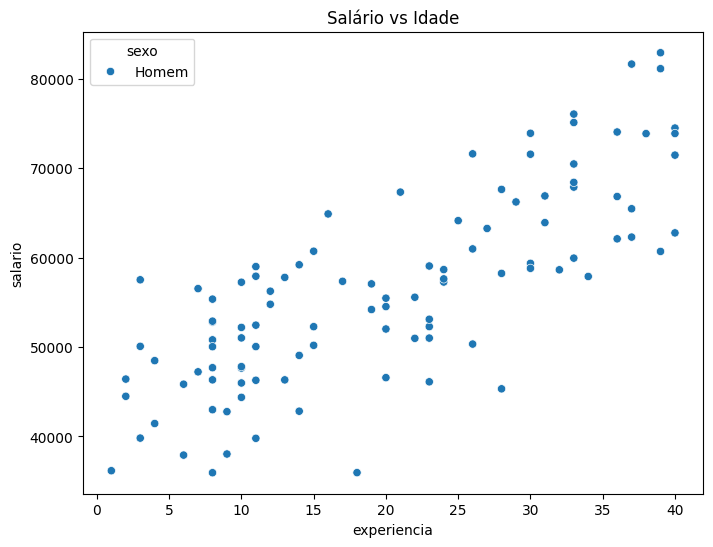

In [217]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='experiencia', y='salario', hue='sexo', data=dataframe_man)
plt.title('Salário vs Idade')
plt.show()

In [218]:
model_lg = LinearRegression()
model_lg.fit(dataframe_man[["experiencia"]], dataframe_man["salario"])

a_coeff = model_lg.coef_[0]
l_coeff = model_lg.intercept_

print("Coeficiente Angular: {0}\nCoeficiente Linear: {1}".format(a_coeff, l_coeff))

Coeficiente Angular: 733.7730021698883
Coeficiente Linear: 41728.85972913706


In [219]:
y_pred = l_coeff + a_coeff * dataframe["experiencia"]

print(y_pred)

0      65943.368801
1      65943.368801
2      49800.362753
3      68144.687807
4      49066.589751
           ...     
195    62274.503790
196    46131.497742
197    48332.816749
198    65943.368801
199    55670.546770
Name: experiencia, Length: 200, dtype: float64


#### Linha de Regressão (Homem)

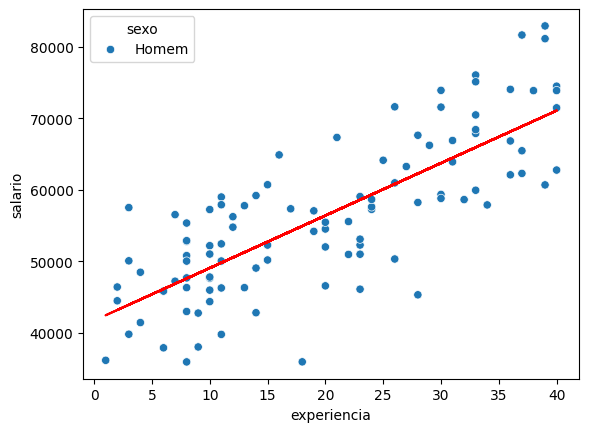

In [220]:
sns.scatterplot(x='experiencia', y='salario', hue='sexo', data=dataframe_man)
plt.plot(dataframe_man["experiencia"], l_coeff + a_coeff * dataframe_man["experiencia"], color="red")
plt.show()

#### Avaliação do Modelo (Homem)

In [221]:
y_real = dataframe_man["salario"]
y_pred = l_coeff + a_coeff * dataframe_man["experiencia"]

#  Erro Quadrático Médio (EQM)
eqm = mean_squared_error(y_real, y_pred)
print(f"EQM: {eqm}")

# Erro Absoluto Médio (MAE)
mae = mean_absolute_error(y_real, y_pred)
print(f"MAE: {mae}")

# Erro Percentual Absoluto Médio (MAPE)
mape = mean_absolute_percentage_error(y_real, y_pred)
print(f"MAPE: {mape * 100:.2f}%")


EQM: 45056668.46212979
MAE: 5451.537514391025
MAPE: 10.11%


### Mulheres

In [222]:

dataframe_woman = dataframe[dataframe["sexo"] == "Mulher"]
dataframe_woman.shape

(97, 5)

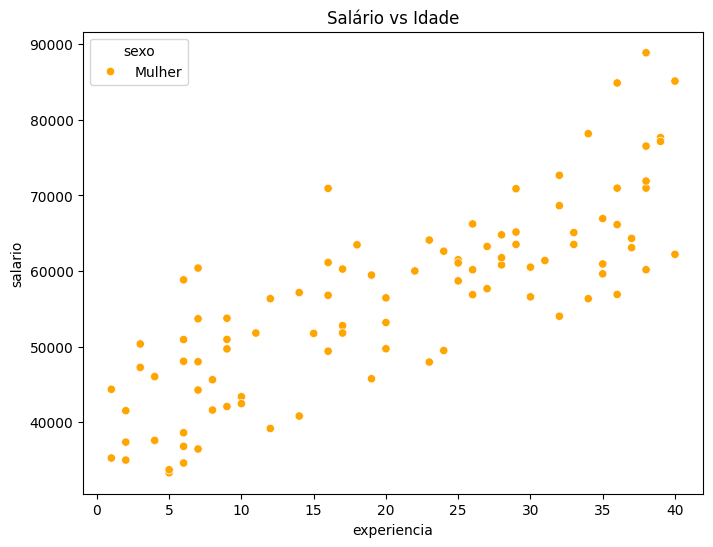

In [223]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='experiencia', y='salario', hue='sexo', data=dataframe_woman, palette=["orange"])
plt.title('Salário vs Idade')
plt.show()

In [224]:
model_lg = LinearRegression()
model_lg.fit(dataframe_woman[["experiencia"]], dataframe_woman["salario"])

a_coeff = model_lg.coef_[0]
l_coeff = model_lg.intercept_

print("Coeficiente Angular: {0}\nCoeficiente Linear: {1}".format(a_coeff, l_coeff))

Coeficiente Angular: 816.856851770595
Coeficiente Linear: 39544.511571352195


In [225]:
y_pred = l_coeff + a_coeff * dataframe["experiencia"]

print(y_pred)

0      66500.787680
1      66500.787680
2      48529.936941
3      68951.358235
4      47713.080089
           ...     
195    62416.503421
196    44445.652682
197    46896.223237
198    66500.787680
199    55064.791755
Name: experiencia, Length: 200, dtype: float64


### Linha de Regressão (Mulher)

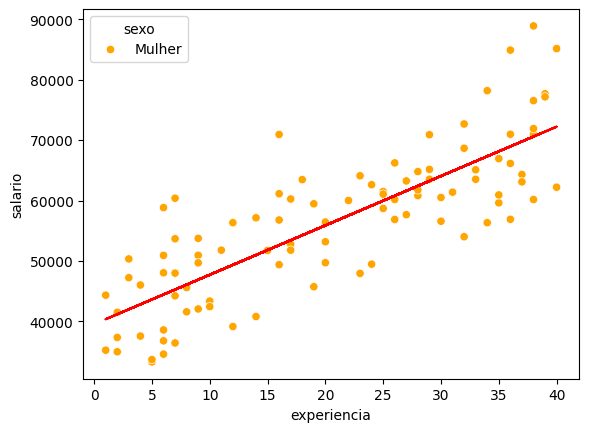

In [226]:
sns.scatterplot(x='experiencia', y='salario', hue='sexo', data=dataframe_woman, palette=["orange"])
plt.plot(dataframe_woman["experiencia"], l_coeff + a_coeff * dataframe_woman["experiencia"], color="red")
plt.show()

#### Avaliação do Modelo (Mulher)

In [227]:
y_real = dataframe_woman["salario"]
y_pred = l_coeff + a_coeff * dataframe_woman["experiencia"]

#  Erro Quadrático Médio (EQM)
eqm = mean_squared_error(y_real, y_pred)
print(f"EQM: {eqm}")

# Erro Absoluto Médio (MAE)
mae = mean_absolute_error(y_real, y_pred)
print(f"MAE: {mae}")

# Erro Percentual Absoluto Médio (MAPE)
mape = mean_absolute_percentage_error(y_real, y_pred)
print(f"MAPE: {mape * 100:.2f}%")


EQM: 49644071.280976504
MAE: 5715.296967292734
MAPE: 10.65%


### Comparação dos modelos Homem x Mulher

#### Homem:
Coeficiente Angular: 733.77

Coeficiente Linear: 41728.85
<hr>
EQM: 45056668.46

MAE: 5451.53

MAPE: 10.11%


#### Mulher:

Coeficiente Angular: 816.85

Coeficiente Linear: 39544.51

<hr>

EQM: 49644071.28

MAE: 5715.29

MAPE: 10.65%

Há pequenas diferenças nos coeficientes.

Por exemplo, o coeficiente angular de homens é menor enquanto o menor das mulheres é o Linear.

A respeito dos erros, os de homens erram menos, mas BEM pouco, não variando nem 1% para o MAPE e menos de 300 para o MAE (não vou levar em consideração o EQM, porque como dito, ele não é uma boa métrica neste caso)

Dado os valores por gênero, sim, a variável escolhida foi um excelente preditor do salário do dataset, tendo pouca variação dado o gênero e é a que melhor se traça a linha se comparado com as outras variáveis!

#### Melhorias no modelo

Tentaria criar novas variáveis para conseguir traçar novas retas, como por exemplo com salários com grandes variação.

Ou até mesmo, tentar resolver o problema de erro quadrático, dado que no momento ele é descartável (Tentando reescalonar, por exemplo).

